In [1]:
import numpy as np
from uncertainties import ufloat

#Messwerte
x_0=np.array([ufloat(441,1/2),ufloat(479,1/2),ufloat(473,1/2),ufloat(463,1/2),ufloat(468,1/2)])
x_1=np.array([ufloat(414,1/2),ufloat(453,1/2),ufloat(447,1/2),ufloat(436,1/2),ufloat(440,1/2)])
x_2=np.array([ufloat(417,1/2),ufloat(456,1/2),ufloat(450,1/2),ufloat(439,1/2),ufloat(443,1/2)])

#Dichte von Wasser bei 20 Grad Celsius
rho_o2=998

#Formel fuer Dichte des Objektes
rho=rho_o2*(x_1-x_0)/(x_1-x_2)

print(rho)

#Mittelwert (Bestwert) und Standardabweichung
print(sum(rho)/len(rho))

[8982.0+/-2009.8133136078973 8649.333333333334+/-1931.8232097115533
 8649.333333333334+/-1931.8232097115533 8982.0+/-2009.8133136078973
 9314.666666666666+/-2087.8348936661337]
(8.9+/-0.9)e+03


In [2]:
import numpy as np
from uncertainties import ufloat

#Messwerte
x_0=np.array([ufloat(449,1/2),ufloat(466,1/2),ufloat(440,1/2),ufloat(482,1/2)])
x_1=np.array([ufloat(424,1/2),ufloat(438,1/2),ufloat(414,1/2),ufloat(455,1/2)])
x_2=np.array([ufloat(427,1/2),ufloat(441,1/2),ufloat(417,1/2),ufloat(458,1/2)])

#Dichte von Objekt
rho_obj=ufloat(8900,1800)

#Formel fuer Dichte der Fluessigkeit
rho_fl=rho_obj*(x_1-x_2)/(x_1-x_0)

print(rho_fl)

#Mittelwert (Bestwert) und Standardabweichung
print(sum(rho_fl)/len(rho_fl))

[1068.0+/-321.4534790603455 953.5714285714286+/-287.8851820302507
 1026.923076923077+/-309.4241593198329
 988.8888888888889+/-298.265206056054]
(1.01+/-0.23)e+03


In [3]:
n=np.array([8982,8649,8649,8982,9315])
print(np.mean(n),'+/-',np.std(n,ddof=1))

8915.4 +/- 278.60778883584715


In [4]:
n=np.array([1068,954,1027,989])
print(np.mean(n),'+/-',np.std(n,ddof=1))

1009.5 +/- 49.08835571361773


In [5]:
n=np.array([8982,8649,8649,8982,9315])
ufloat(np.mean(n),np.std(n,ddof=1))/np.sqrt(5)

3987.088089320325+/-124.59719097957223

In [6]:
n=np.array([1068,954,1027,989])
ufloat(np.mean(n),np.std(n,ddof=1))/np.sqrt(4)

504.75+/-24.544177856808865

1.0324417381859667


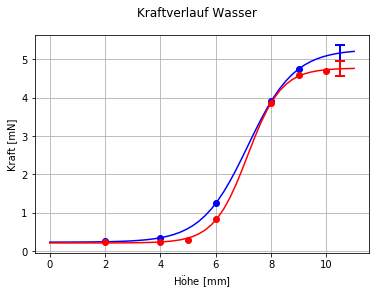

0.9498352409202234


In [9]:
#Wasser
import matplotlib.pyplot as plt
from scipy import interpolate
import pylab
from scipy.optimize import curve_fit
from pylab import savefig
import numpy as np

def sigmoid(x,a,b,c,d):
    return d*(1/(1+np.exp(-c*(x-a))))+b

h1=np.array([2,4,6,8,9])
h2=np.array([2,4,5,6,8,9,10])
r1=np.array([0.26,0.33,1.25,3.9,4.75])
r2=np.array([0.23,0.25,0.3,0.83,3.85,4.6,4.7])
popt,pvoc=curve_fit(sigmoid,h1,r1,method='dogbox')
a,b,c,d=popt
r1_fit=sigmoid(np.linspace(0,11,50),a,b,c,d)
plt.plot(np.linspace(0,11,50),r1_fit,color='blue')
plt.plot(h1,r1,color='blue',marker='o',LineStyle='none')
print(sigmoid(10.5,a,b,c,d)*0.2)
x=[10.5]
y=[sigmoid(x,a,b,c,d)]
o21=sigmoid(10.5,a,b,c,d)*0.2
plt.errorbar(x,y,[0.2],capsize=5,elinewidth=2,markeredgewidth=2,ecolor='blue')

popt,pvoc=curve_fit(sigmoid,h2,r2,method='dogbox')
a,b,c,d=popt
r2_fit=sigmoid(np.linspace(0,11,50),a,b,c,d)
plt.plot(np.linspace(0,11,50),r2_fit,color='red')
plt.plot(h2,r2,color='red',marker='o',LineStyle='none')
x=[10.5]
y=[sigmoid(x,a,b,c,d)]
plt.errorbar(x,y,[0.2],capsize=5,elinewidth=2,markeredgewidth=2,ecolor='red')

plt.suptitle('Kraftverlauf Wasser')
plt.xlabel(r'$\mathrm{H\"ohe\ [mm]}$')
plt.ylabel(r'Kraft [mN]')
plt.grid()
plt.savefig(fname='Graph_1.png',dpi=300)
plt.show()
o22=sigmoid(10.5,a,b,c,d)*0.2
print(sigmoid(10.5,a,b,c,d)*0.2)

Erster Satz:  [array([1.26982979])]
Zweiter Satz:  [array([1.42229408])]
Dritter Satz:  [array([1.37688351])]


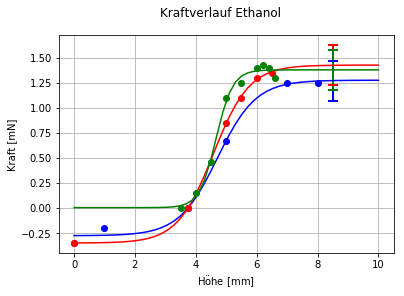

In [10]:
#Ethanol
h1=np.array([0,1,3.75,5,7,8])
h2=np.array([0,3.75,5,5.5,6,6.5])
h3=np.array([3.5,4,4.5,5,5.5,6,6.2,6.4,6.6])
r1=np.array([-0.35,-0.2,0,0.67,1.25,1.25])
r2=np.array([-0.35,0,0.85,1.1,1.3,1.35])
r3=np.array([0,0.15,0.46,1.1,1.25,1.4,1.43,1.4,1.3])
popt,pvoc=curve_fit(sigmoid,h1,r1,method='dogbox')
a,b,c,d=popt
r1_fit=sigmoid(np.linspace(0,10,50),a,b,c,d)
plt.plot(np.linspace(0,10,50),r1_fit,color='blue')
plt.plot(h1,r1,color='blue',marker='o',LineStyle='none')
x=[8.5]
y=[sigmoid(x,a,b,c,d)]
print('Erster Satz: ',y)
plt.errorbar(x,y,[0.2],capsize=5,elinewidth=2,markeredgewidth=2,ecolor='blue')

popt,pvoc=curve_fit(sigmoid,h2,r2,method='dogbox')
a,b,c,d=popt
r2_fit=sigmoid(np.linspace(0,10,50),a,b,c,d)
plt.plot(np.linspace(0,10,50),r2_fit,color='red')
plt.plot(h2,r2,color='red',marker='o',LineStyle='none')
x=[8.5]
y=[sigmoid(x,a,b,c,d)]
print('Zweiter Satz: ',y)
plt.errorbar(x,y,[0.2],capsize=5,elinewidth=2,markeredgewidth=2,ecolor='red')

popt,pvoc=curve_fit(sigmoid,h3,r3,method='dogbox')
a,b,c,d=popt
r3_fit=sigmoid(np.linspace(0,10,50),a,b,c,d)
plt.plot(np.linspace(0,10,50),r3_fit,color='green')
plt.plot(h3,r3,color='green',marker='o',LineStyle='none')
x=[8.5]
y=[sigmoid(x,a,b,c,d)]
print('Dritter Satz: ',y)
plt.errorbar(x,y,[0.2],capsize=5,elinewidth=2,markeredgewidth=2,ecolor='green')

plt.suptitle('Kraftverlauf Ethanol')
plt.xlabel(r'$\mathrm{H\"ohe\ [mm]}$')
plt.ylabel(r'Kraft [mN]')
plt.grid()
plt.savefig(fname='Graph_2.png',dpi=300)
plt.show()

In [11]:
from uncertainties import ufloat

f1=1.27
f1e=1.27*0.2
f2=1.42
f2e=1.42*0.2
f3=1.38
f3e=1.38*0.2
F1=ufloat(f1,f1e)
F2=ufloat(f2,f2e)
F3=ufloat(f3,f3e)
fw1=5.16
fw1e=5.16*0.2
fw2=4.75
fw2e=4.75*0.2
Fw1=ufloat(fw1,fw1e)
Fw2=ufloat(fw2,fw2e)
print(f1,f1e,f2,f2e,f3,f3e)
print(Fw1,Fw2)

1.27 0.254 1.42 0.284 1.38 0.27599999999999997
5.2+/-1.0 4.8+/-1.0


In [12]:
0.3/1.3

0.23076923076923075

In [13]:
def sigcalc(F,l):
    return F/(2*l)
l=ufloat(2.63,0.03)
fs1=sigcalc(F1,l)
fs2=sigcalc(F2,l)
fs3=sigcalc(F3,l)
print((fs1+fs2+fs3)/3)

0.258+/-0.030


In [14]:
def sigcalc(F,l):
    return F/(2*l)
l=ufloat(2.63,0.03)
fs1=sigcalc(Fw1,l)
print(fs1)
fs2=sigcalc(Fw2,l)
print(fs2)
print((fs1+fs2)/2)

0.98+/-0.20
0.90+/-0.18
0.94+/-0.13
